In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
insurance_df=pd.read_csv("insurance_final_dataset.csv")
insurance_df

,claim_id,claim_amount_SZL,claim_type,multiple_claims_flag,late_payment_history,poverty_index,age,gender,rural_vs_urban,highest_education_level,...,mobile_money_usage,financial_stability_index,policy_type,payment_method,policy_claim_frequency,policy_lapse_history,policy_maturity_years,policy_premium_SZL,policy_deductible_SZL,coverage_type
0,1,92345.33,fire damage,no,no,13.45,45,female,rural,Degree,...,yes,54.95,home insurance,Mobile Money,2,no,25,6662.36,19904.37,Premium
1,2,46029.42,road accident,no,no,10.05,29,male,rural,Degree,...,yes,16.24,vehicle insurance,Payroll Deduction,0,no,6,10715.36,41074.12,Comprehensive
2,3,114275.22,theft,yes,no,12.35,54,female,rural,NaN,...,yes,65.39,vehicle insurance,Payroll Deduction,6,no,9,7472.23,11471.71,Basic
3,4,68858.64,fire damage,yes,yes,48.20,57,female,rural,Secondary,...,yes,43.14,home insurance,Cash,0,no,25,7661.53,36764.72,Premium
4,5,48337.09,livestock loss,no,yes,18.08,77,female,urban,NaN,...,no,60.92,funeral cover,Payroll Deduction,8,no,27,8708.03,11779.59,Comprehensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,129613.61,storm damage,no,no,17.24,77,female,rural,Diploma,...,no,32.27,home insurance,Mobile Money,9,no,4,6142.94,16981.70,Premium
9996,9997,74096.47,road accident,no,no,26.32,54,male,rural,Secondary,...,no,20.57,vehicle insurance,Payroll Deduction,8,yes,8,12119.51,28809.54,Premium
9997,9998,65131.45,fire damage,no,no,18.90,55,female,urban,Primary,...,yes,56.21,vehicle insurance,Payroll Deduction,7,no,10,4957.33,16600.49,Basic
9998,9999,35313.83,theft,no,no,17.21,21,female,rural,Secondary,...,yes,18.00,health insurance,Mobile Money,5,yes,5,10436.34,4193.78,Basic


In [43]:
#remove duplicates
insurance_df.drop_duplicates(inplace=True)

In [44]:
#info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   claim_id                   10000 non-null  int64  
 1   claim_amount_SZL           10000 non-null  float64
 2   claim_type                 10000 non-null  object 
 3   multiple_claims_flag       10000 non-null  object 
 4   late_payment_history       10000 non-null  object 
 5   poverty_index              10000 non-null  float64
 6   age                        10000 non-null  int64  
 7   gender                     10000 non-null  object 
 8   rural_vs_urban             10000 non-null  object 
 9   highest_education_level    8068 non-null   object 
 10  household_size             10000 non-null  int64  
 11  main_income_source         10000 non-null  object 
 12  has_dependents             10000 non-null  object 
 13  dependents_count           10000 non-null  int6

In [45]:
#checking null values
insurance_df.isnull().sum()

claim_id                        0
claim_amount_SZL                0
claim_type                      0
multiple_claims_flag            0
late_payment_history            0
poverty_index                   0
age                             0
gender                          0
rural_vs_urban                  0
highest_education_level      1932
household_size                  0
main_income_source              0
has_dependents                  0
dependents_count                0
property_ownership_status       0
mobile_money_usage              0
financial_stability_index       0
policy_type                     0
payment_method                  0
policy_claim_frequency          0
policy_lapse_history            0
policy_maturity_years           0
policy_premium_SZL              0
policy_deductible_SZL           0
coverage_type                   0
dtype: int64

In [46]:
(insurance_df.isnull().sum()/len(insurance_df))*100

claim_id                      0.00
claim_amount_SZL              0.00
claim_type                    0.00
multiple_claims_flag          0.00
late_payment_history          0.00
poverty_index                 0.00
age                           0.00
gender                        0.00
rural_vs_urban                0.00
highest_education_level      19.32
household_size                0.00
main_income_source            0.00
has_dependents                0.00
dependents_count              0.00
property_ownership_status     0.00
mobile_money_usage            0.00
financial_stability_index     0.00
policy_type                   0.00
payment_method                0.00
policy_claim_frequency        0.00
policy_lapse_history          0.00
policy_maturity_years         0.00
policy_premium_SZL            0.00
policy_deductible_SZL         0.00
coverage_type                 0.00
dtype: float64

In [47]:
insurance_df["highest_education_level"]=insurance_df["highest_education_level"].fillna("Uneducated")

In [48]:
insurance_df["highest_education_level"].unique()

array(['Degree', 'Uneducated', 'Secondary', 'Primary', 'Diploma'],
      dtype=object)

In [49]:
insurance_df.describe(include="all")

,claim_id,claim_amount_SZL,claim_type,multiple_claims_flag,late_payment_history,poverty_index,age,gender,rural_vs_urban,highest_education_level,...,mobile_money_usage,financial_stability_index,policy_type,payment_method,policy_claim_frequency,policy_lapse_history,policy_maturity_years,policy_premium_SZL,policy_deductible_SZL,coverage_type
count,10000.00000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,...,10000,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,6,2,2,NaN,NaN,2,2,5,...,2,NaN,5,4,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,fire damage,no,no,NaN,NaN,female,rural,Secondary,...,yes,NaN,life insurance,Cash,NaN,no,NaN,NaN,NaN,Premium
freq,NaN,NaN,1701,7531,7041,NaN,NaN,5057,6095,2078,...,6995,NaN,2090,2555,NaN,8016,NaN,NaN,NaN,3396
mean,5000.50000,74540.564433,NaN,NaN,NaN,35.142855,48.584200,NaN,NaN,NaN,...,NaN,50.611174,NaN,NaN,4.583000,NaN,14.956400,7593.686207,25496.930601,NaN
std,2886.89568,43272.901644,NaN,NaN,NaN,14.369454,17.895662,NaN,NaN,NaN,...,NaN,28.395510,NaN,NaN,2.874115,NaN,8.400783,4276.129424,14279.045815,NaN
min,1.00000,104.400000,NaN,NaN,NaN,10.000000,18.000000,NaN,NaN,NaN,...,NaN,1.030000,NaN,NaN,0.000000,NaN,1.000000,202.590000,513.840000,NaN
25%,2500.75000,36807.555000,NaN,NaN,NaN,22.630000,33.000000,NaN,NaN,NaN,...,NaN,25.950000,NaN,NaN,2.000000,NaN,8.000000,3908.280000,13176.050000,NaN
50%,5000.50000,74805.280000,NaN,NaN,NaN,35.290000,49.000000,NaN,NaN,NaN,...,NaN,51.090000,NaN,NaN,5.000000,NaN,15.000000,7540.930000,25280.630000,NaN
75%,7500.25000,111634.922500,NaN,NaN,NaN,47.320000,64.000000,NaN,NaN,NaN,...,NaN,74.970000,NaN,NaN,7.000000,NaN,22.000000,11212.250000,38009.650000,NaN


In [50]:
insurance_df.dtypes

claim_id                       int64
claim_amount_SZL             float64
claim_type                    object
multiple_claims_flag          object
late_payment_history          object
poverty_index                float64
age                            int64
gender                        object
rural_vs_urban                object
highest_education_level       object
household_size                 int64
main_income_source            object
has_dependents                object
dependents_count               int64
property_ownership_status     object
mobile_money_usage            object
financial_stability_index    float64
policy_type                   object
payment_method                object
policy_claim_frequency         int64
policy_lapse_history          object
policy_maturity_years          int64
policy_premium_SZL           float64
policy_deductible_SZL        float64
coverage_type                 object
dtype: object

In [51]:
def assess_risk(row):
    risk_points = 0
    
    if row['late_payment_history'] == 'Yes':
        risk_points += 2
    if row['policy_lapse_history'] == 'Yes':
        risk_points += 2
    if row['policy_claim_frequency'] > 2:
        risk_points += 2
    if pd.notna(row['financial_stability_index']) and row['financial_stability_index'] < 30:
        risk_points += 2
    if pd.notna(row['poverty_index']) and row['poverty_index'] > 40:
        risk_points += 1
    if row['age'] < 25 or row['age'] > 65:
        risk_points += 1
    if row['dependents_count'] > 3:
        risk_points += 1
    if row['mobile_money_usage'] == 'No':
        risk_points += 1
    if pd.notna(row['claim_amount_SZL']):
        if row['claim_amount_SZL'] > 20000:
            risk_points += 2
        elif row['claim_amount_SZL'] > 5000:
            risk_points += 1

    # Risk level assignment
    if risk_points >= 7:
        return 'High'
    elif risk_points >= 4:
        return 'Medium'
    else:
        return 'Low'

In [52]:

# Apply the function
insurance_df['risk_score'] = insurance_df.apply(assess_risk, axis=1)

In [53]:
insurance_df.head(10)

,claim_id,claim_amount_SZL,claim_type,multiple_claims_flag,late_payment_history,poverty_index,age,gender,rural_vs_urban,highest_education_level,...,financial_stability_index,policy_type,payment_method,policy_claim_frequency,policy_lapse_history,policy_maturity_years,policy_premium_SZL,policy_deductible_SZL,coverage_type,risk_score
0,1,92345.33,fire damage,no,no,13.45,45,female,rural,Degree,...,54.95,home insurance,Mobile Money,2,no,25,6662.36,19904.37,Premium,Low
1,2,46029.42,road accident,no,no,10.05,29,male,rural,Degree,...,16.24,vehicle insurance,Payroll Deduction,0,no,6,10715.36,41074.12,Comprehensive,Medium
2,3,114275.22,theft,yes,no,12.35,54,female,rural,Uneducated,...,65.39,vehicle insurance,Payroll Deduction,6,no,9,7472.23,11471.71,Basic,Medium
3,4,68858.64,fire damage,yes,yes,48.20,57,female,rural,Secondary,...,43.14,home insurance,Cash,0,no,25,7661.53,36764.72,Premium,Low
4,5,48337.09,livestock loss,no,yes,18.08,77,female,urban,Uneducated,...,60.92,funeral cover,Payroll Deduction,8,no,27,8708.03,11779.59,Comprehensive,Medium
5,6,144574.83,storm damage,no,no,46.36,18,female,urban,Primary,...,42.40,home insurance,Bank Transfer,2,no,12,9870.01,41291.31,Premium,Medium
6,7,129794.52,health emergency,no,no,13.74,44,male,rural,Diploma,...,28.15,vehicle insurance,Mobile Money,4,no,10,10147.72,40998.12,Basic,Medium
7,8,27131.27,livestock loss,no,no,42.01,36,male,rural,Diploma,...,2.81,life insurance,Payroll Deduction,1,yes,1,13318.86,9341.77,Premium,Medium
8,9,105125.95,health emergency,no,no,37.98,49,male,rural,Diploma,...,1.13,health insurance,Cash,1,no,4,443.74,24202.83,Comprehensive,Medium
9,10,113172.42,fire damage,no,yes,59.33,47,male,rural,Uneducated,...,53.10,health insurance,Bank Transfer,1,no,10,5760.21,36347.90,Comprehensive,Medium


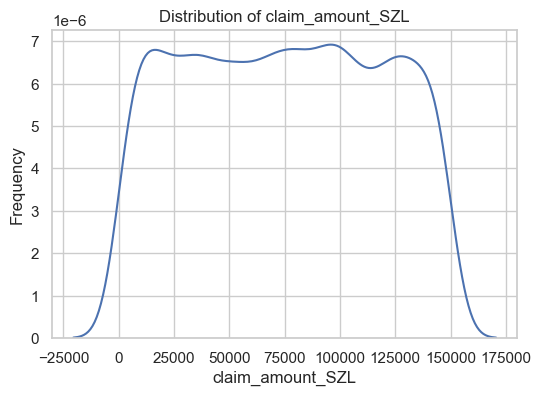

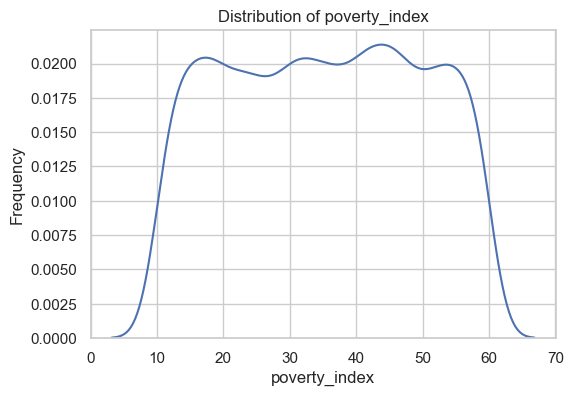

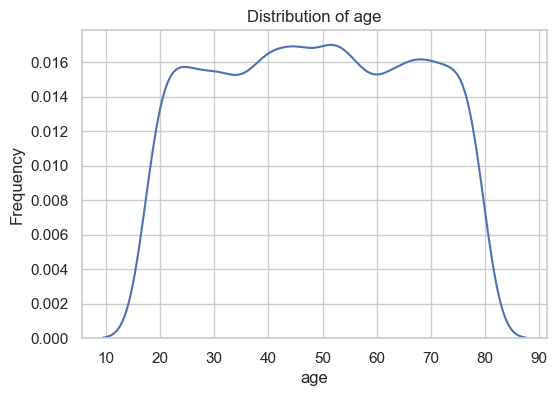

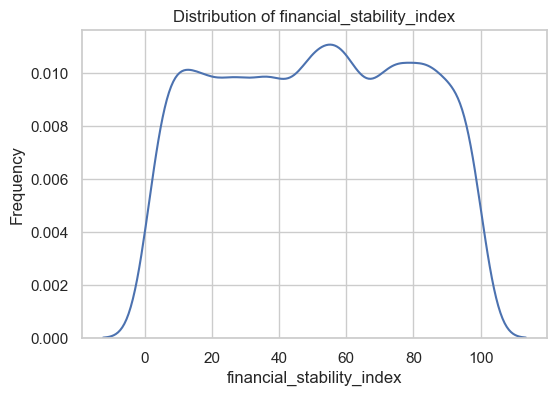

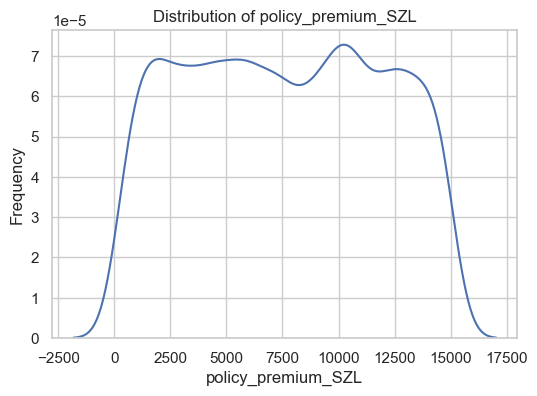

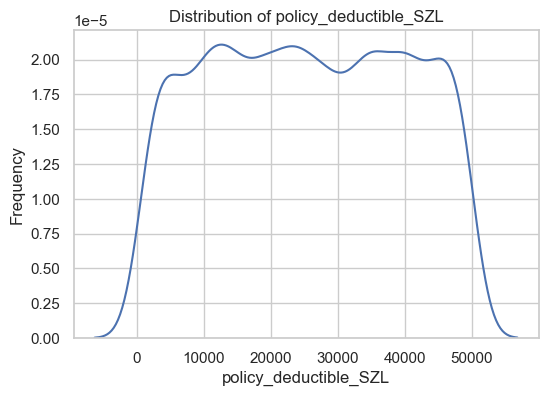

In [14]:
#univariant analysis
import matplotlib.pyplot as plt
# Set visual style
sns.set(style='whitegrid')
numerical_cols = [
    'claim_amount_SZL', 'poverty_index', 'age',
    'financial_stability_index','policy_premium_SZL', 'policy_deductible_SZL'
]
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(insurance_df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

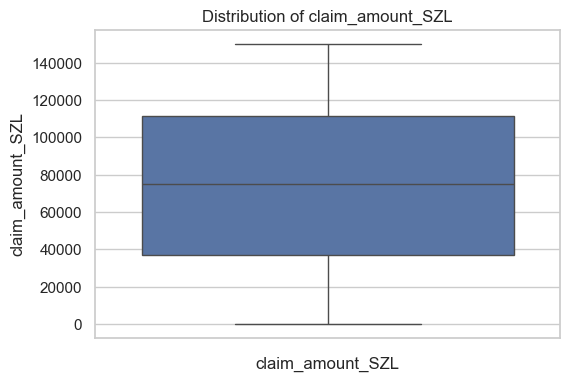

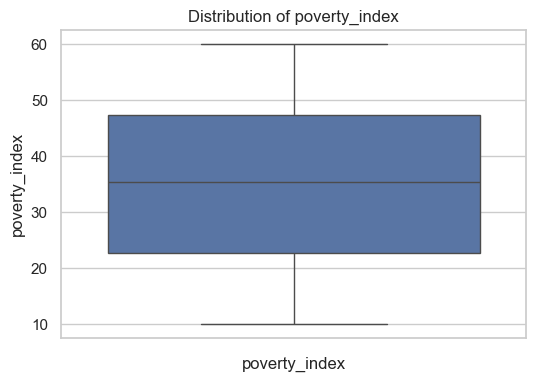

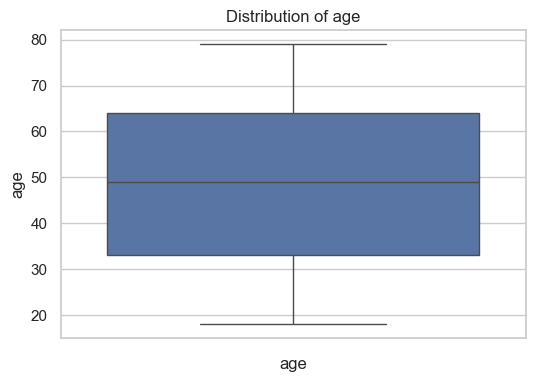

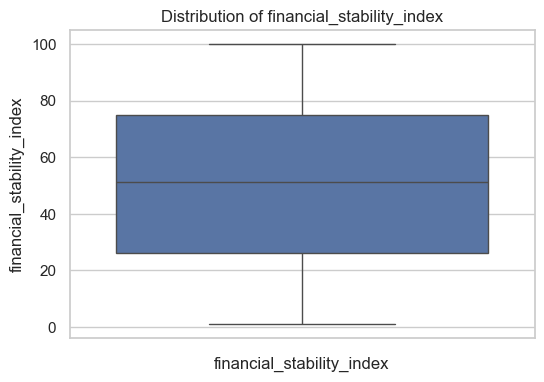

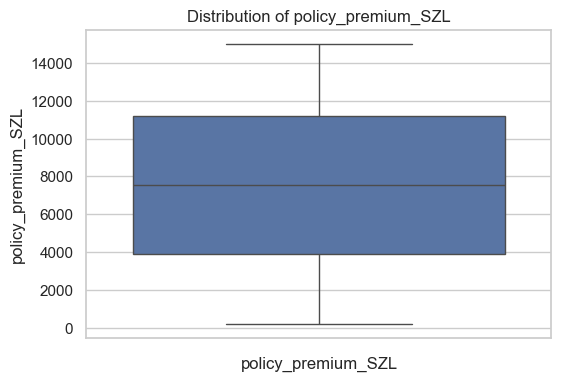

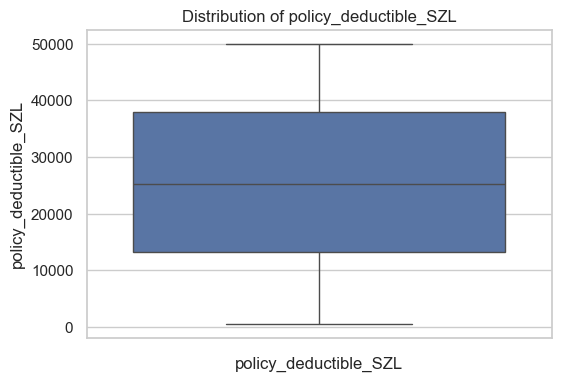

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(insurance_df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

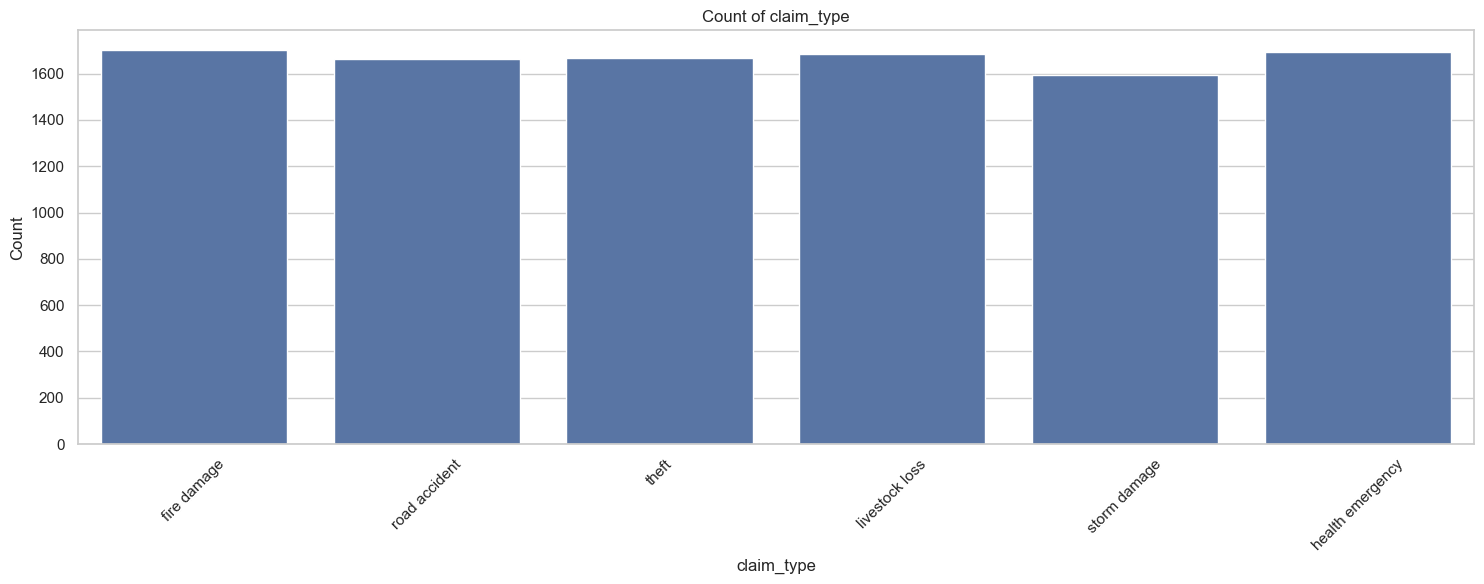

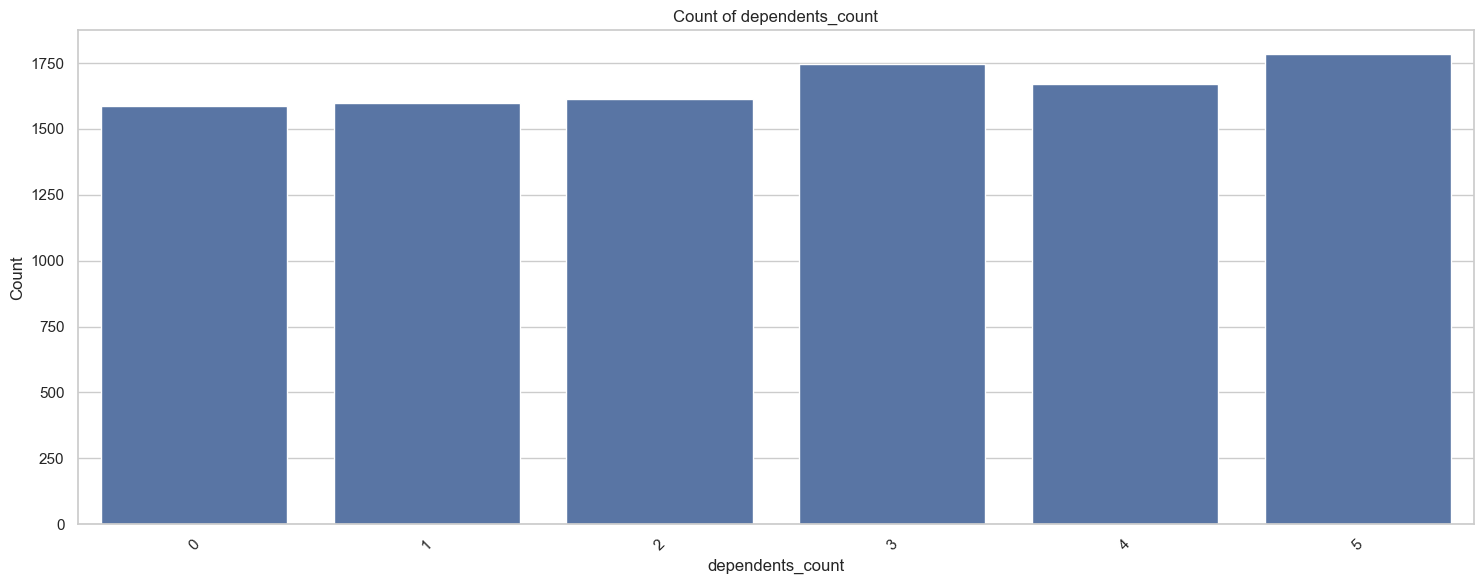

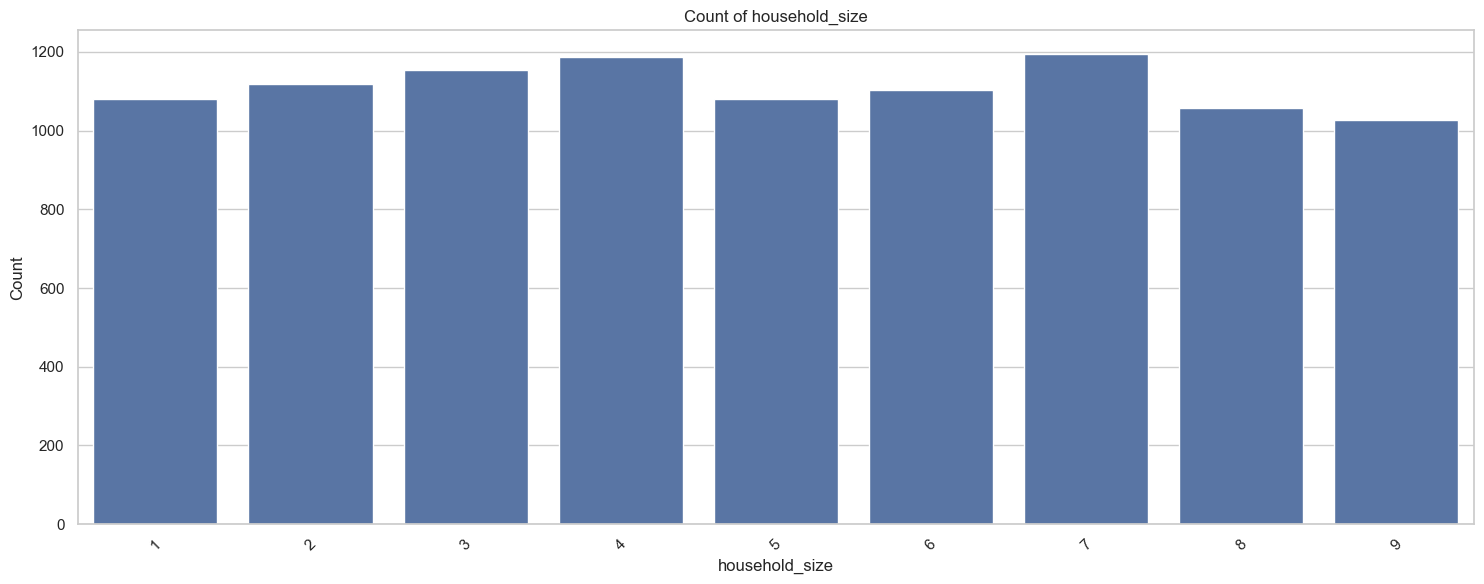

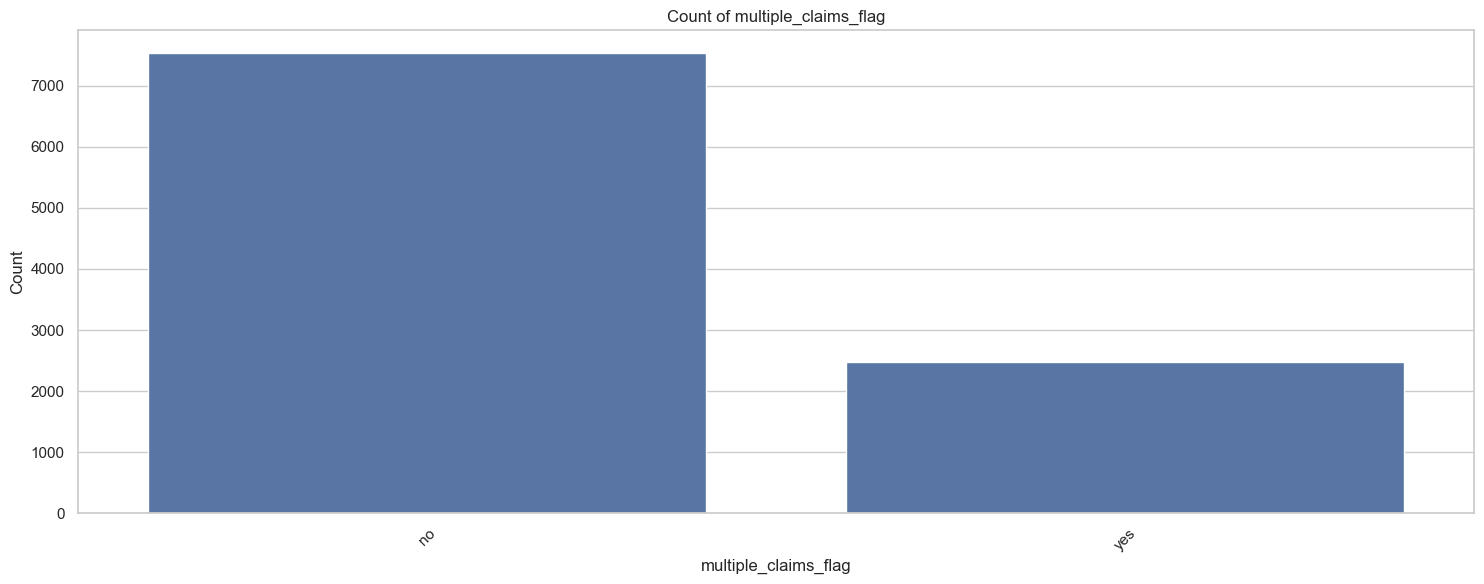

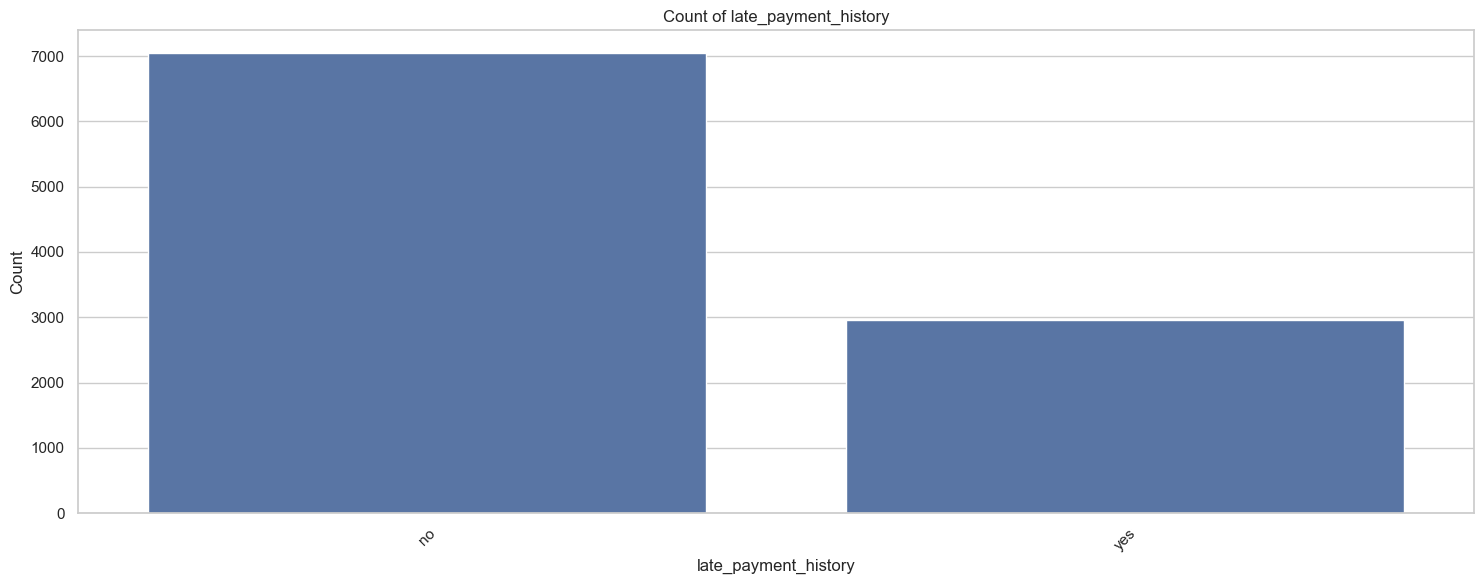

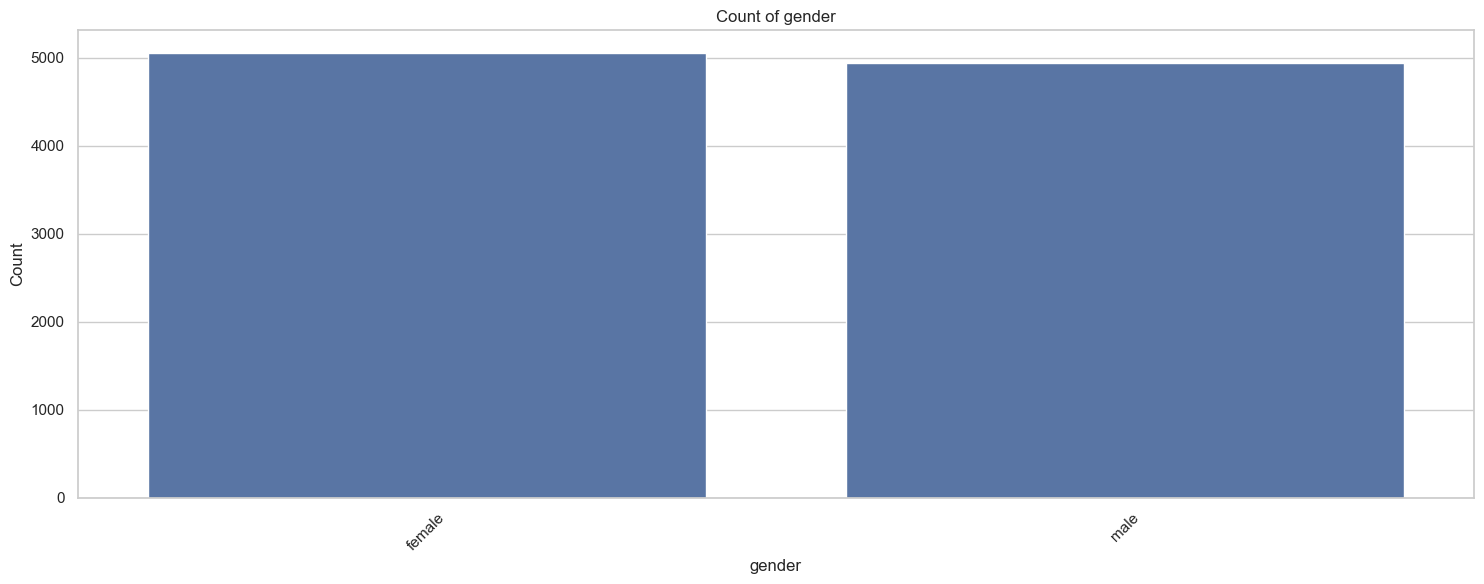

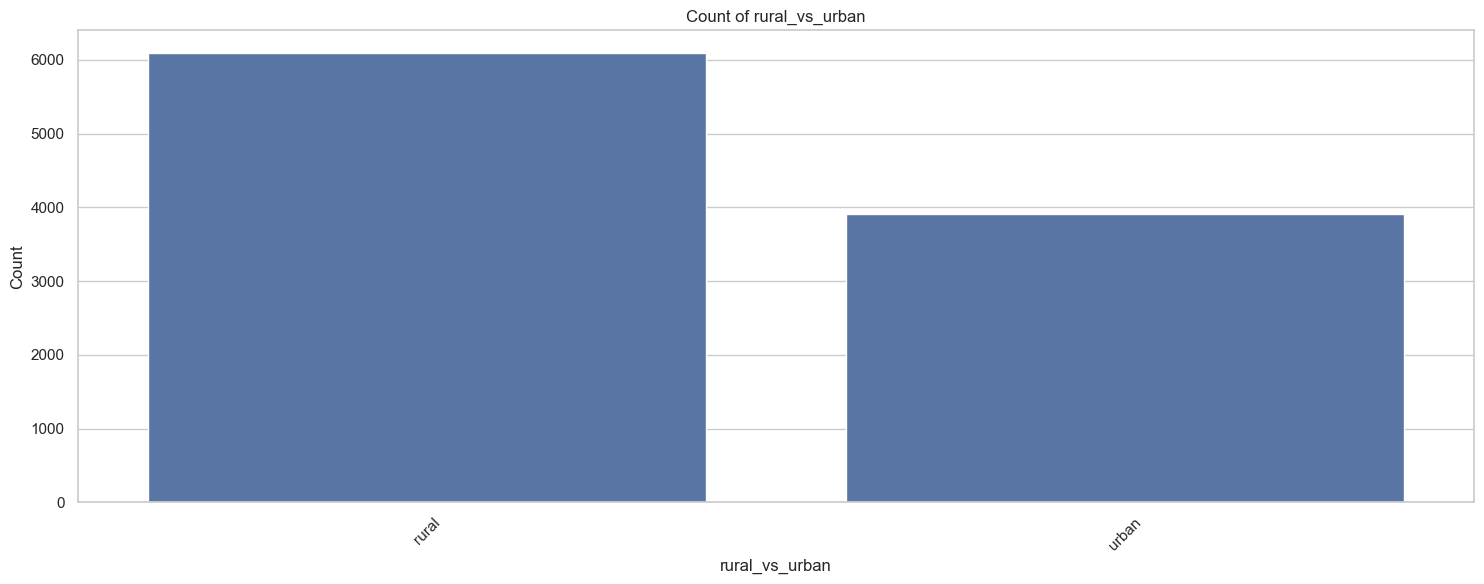

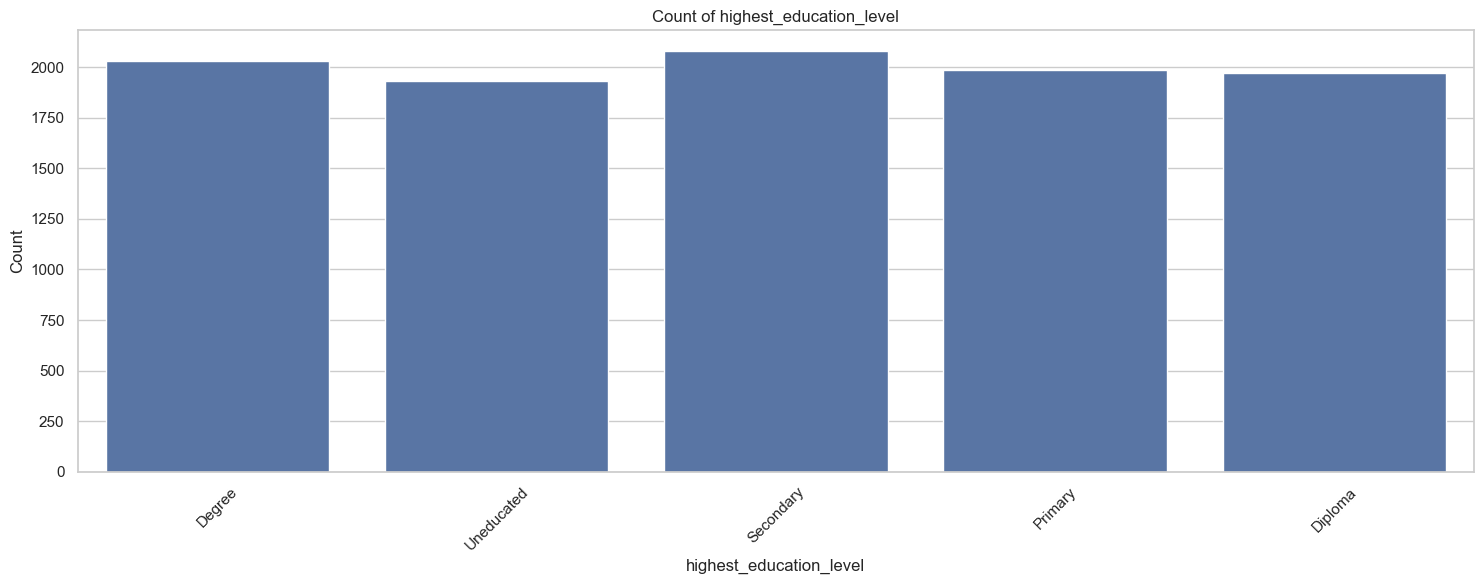

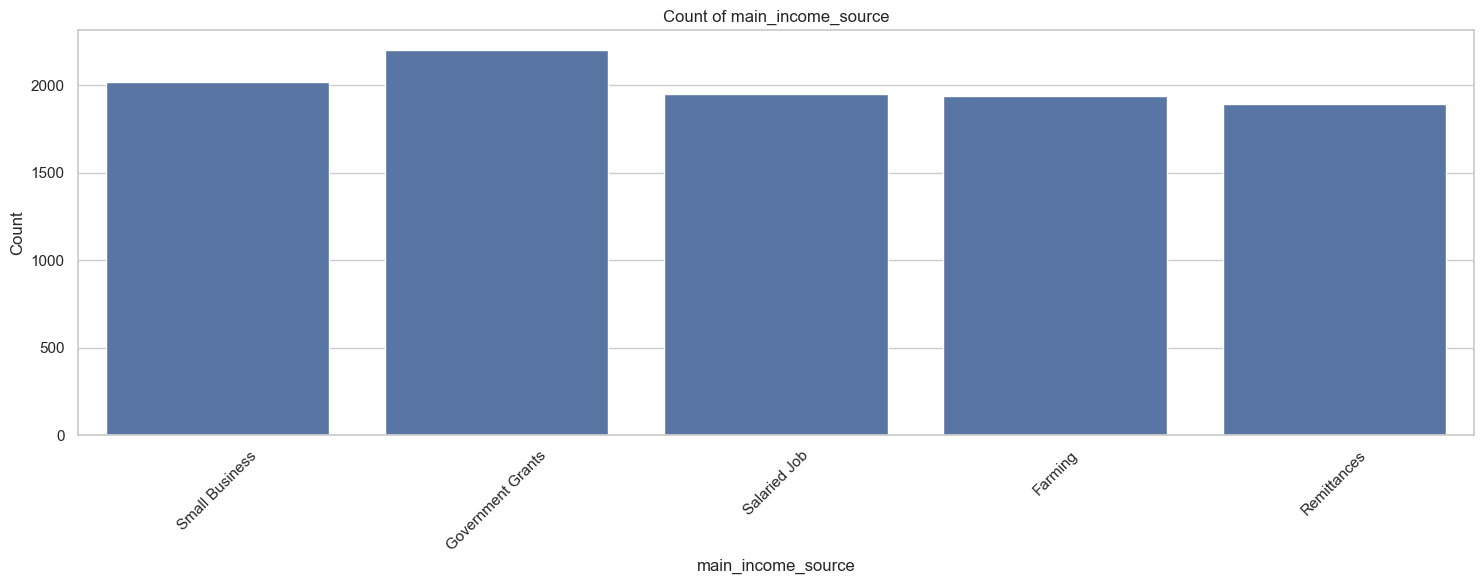

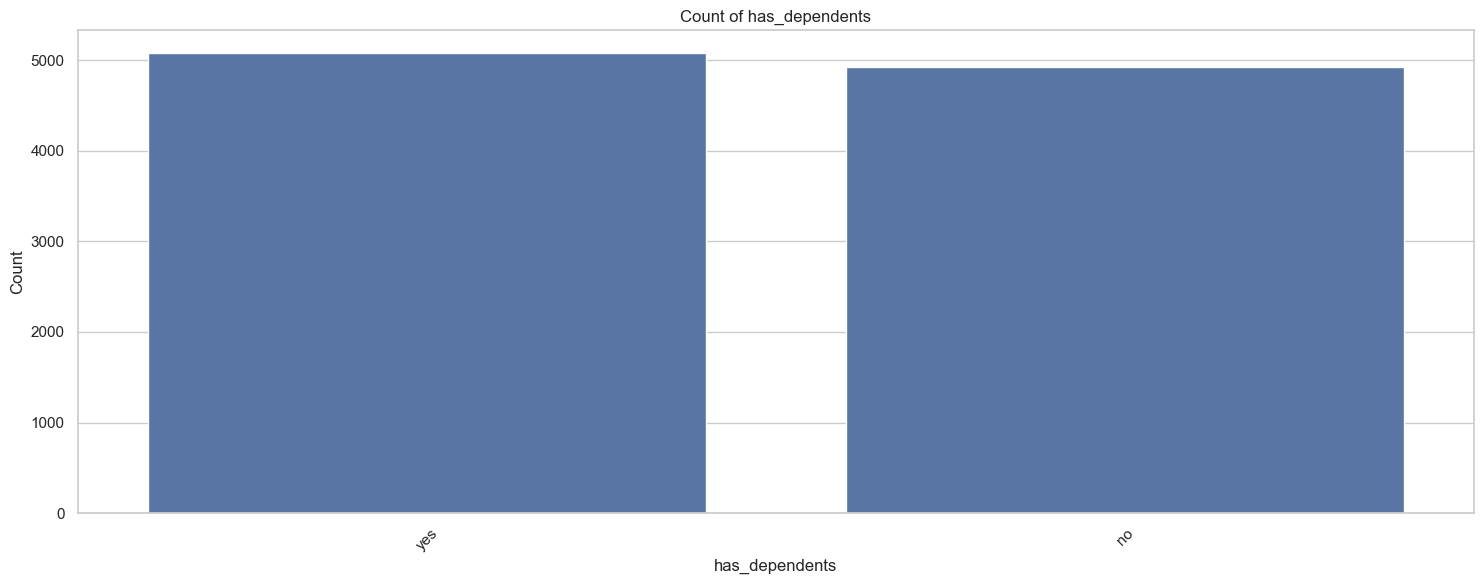

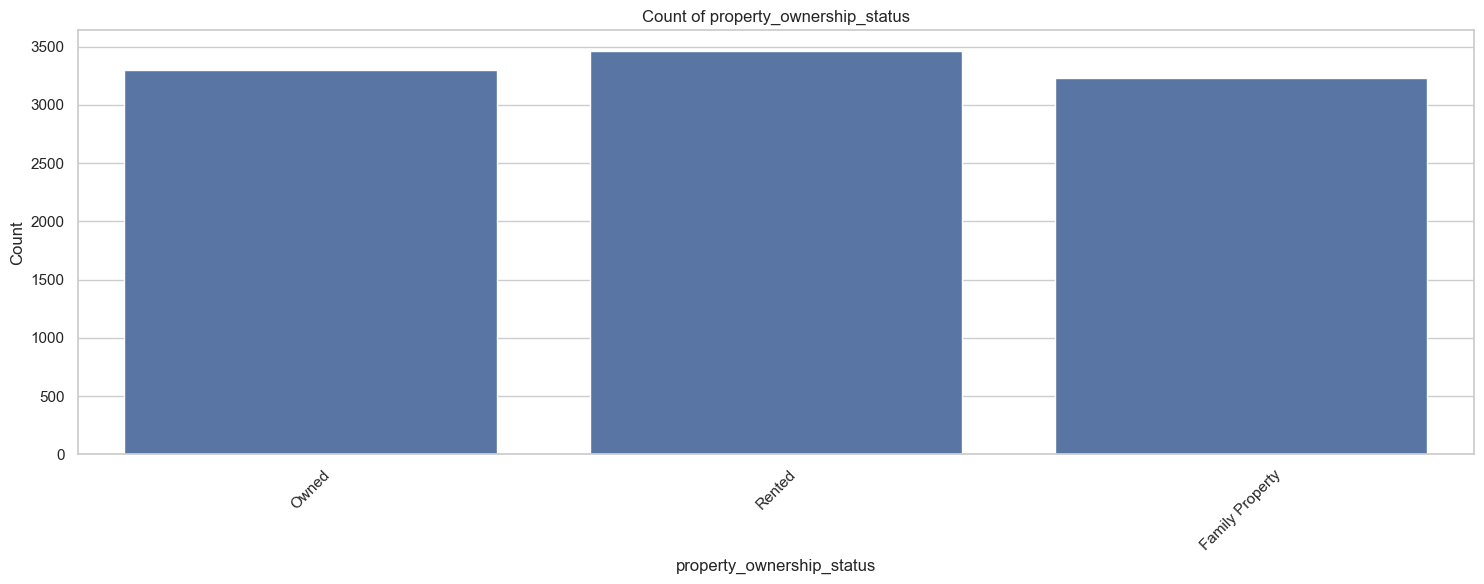

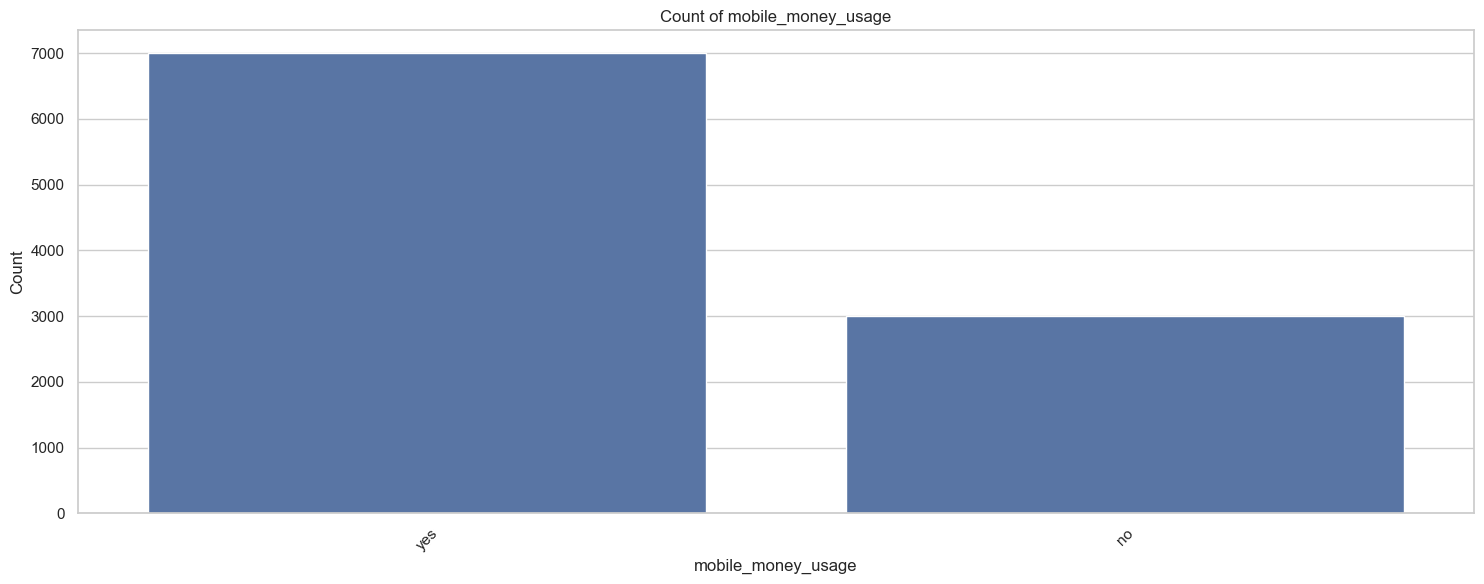

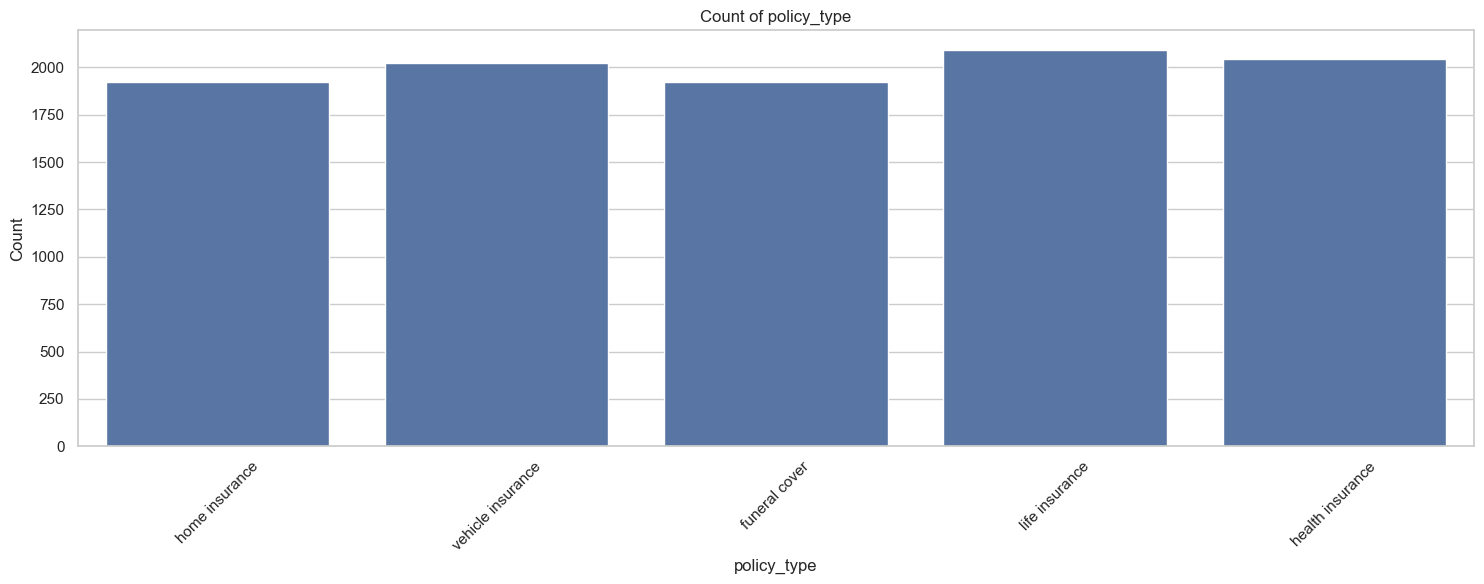

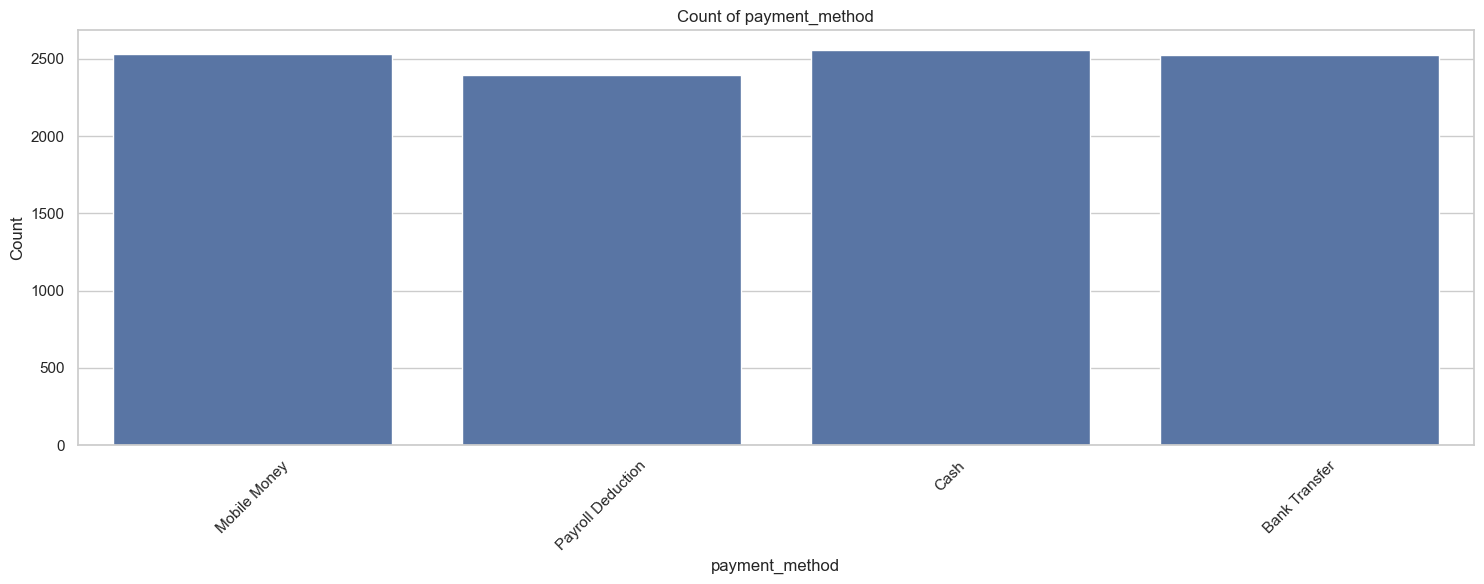

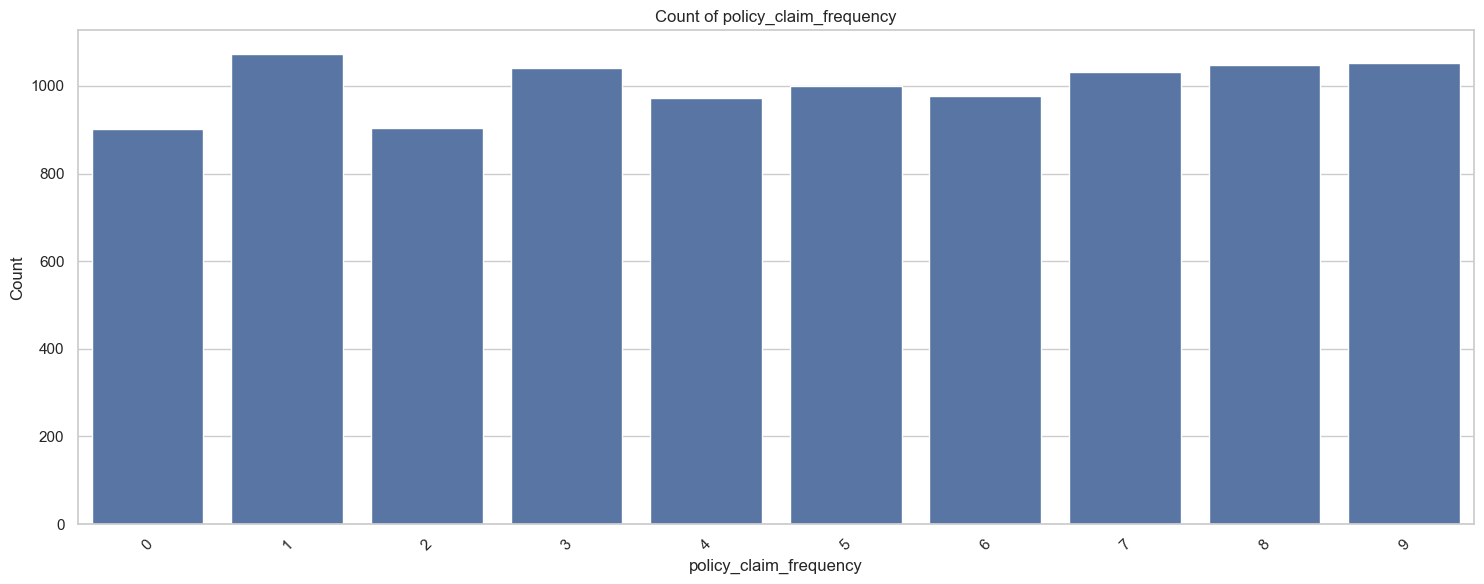

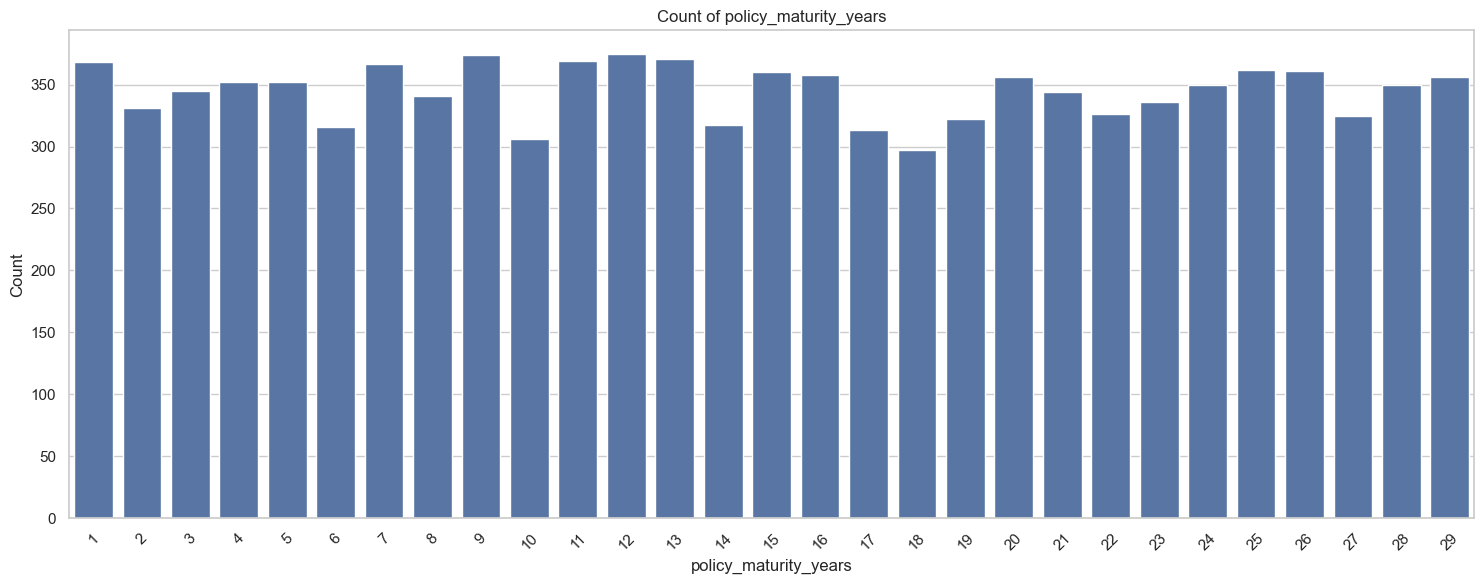

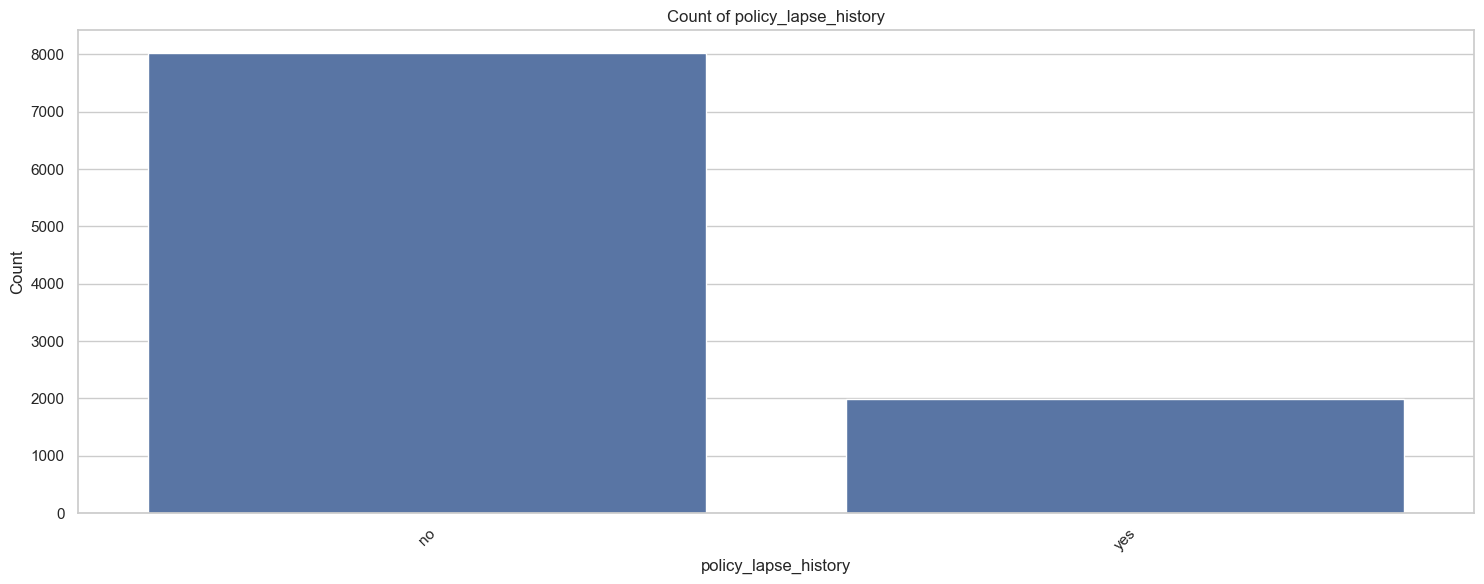

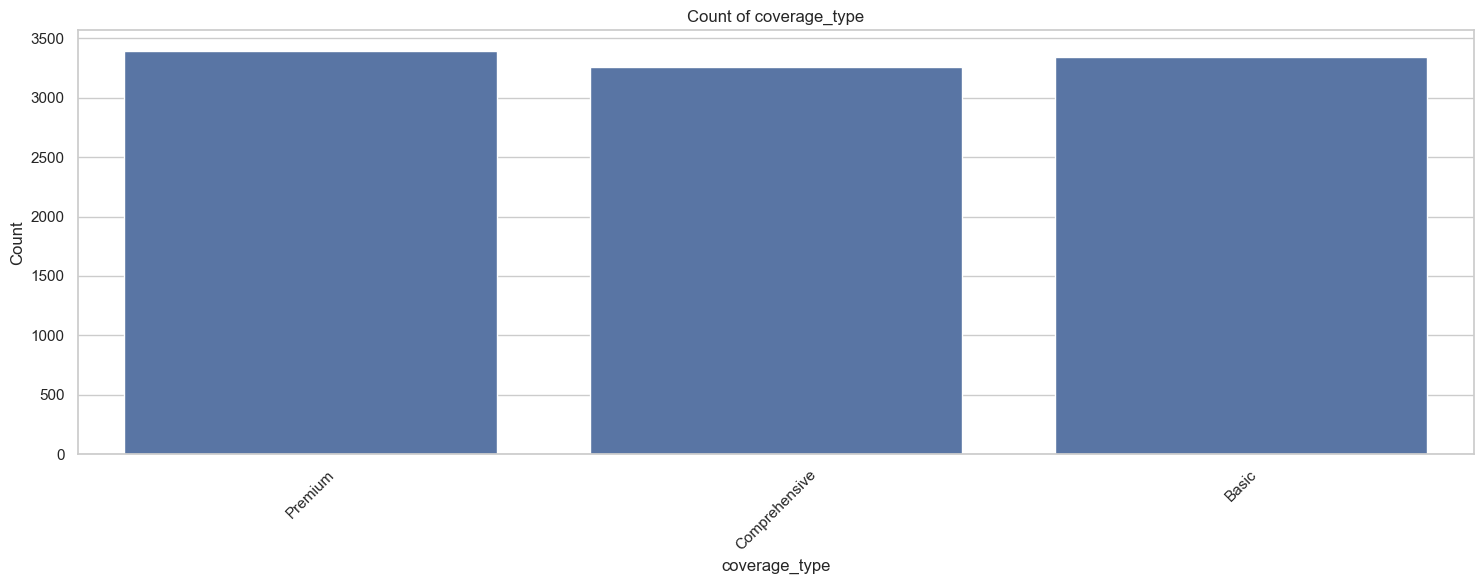

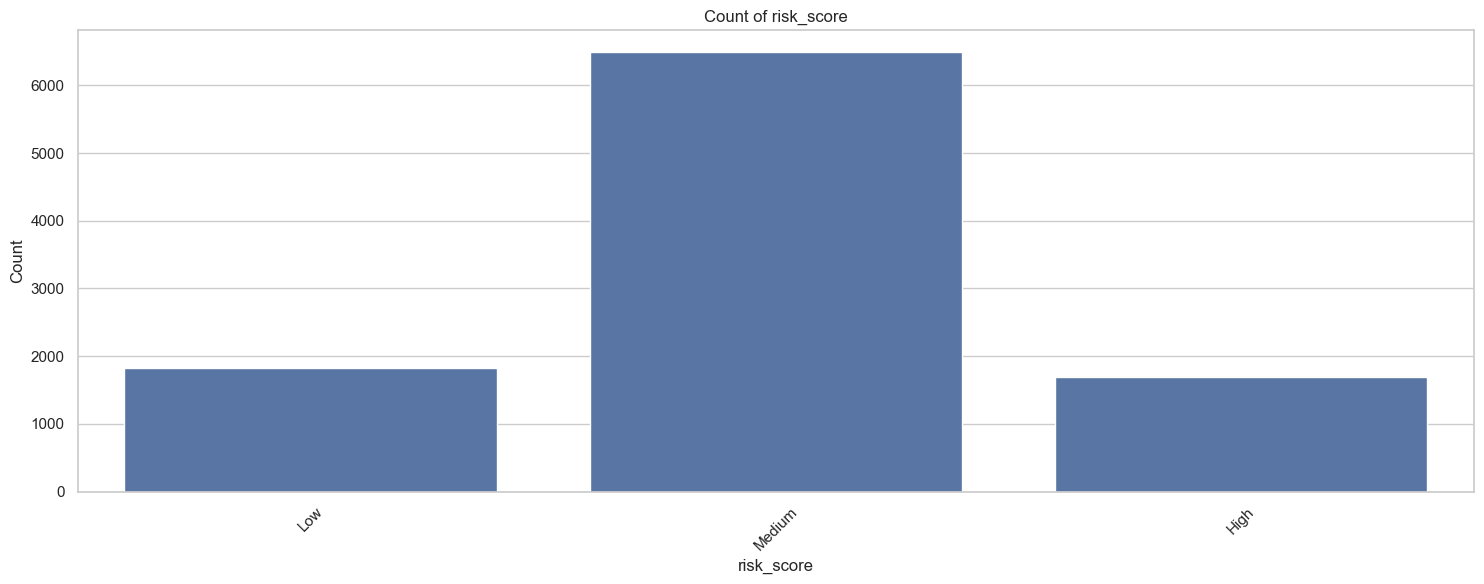

In [24]:
categorical_cols = [
    'claim_type','dependents_count', 'household_size','multiple_claims_flag', 'late_payment_history',
    'gender', 'rural_vs_urban', 'highest_education_level',
    'main_income_source', 'has_dependents', 'property_ownership_status',
    'mobile_money_usage', 'policy_type', 'payment_method','policy_claim_frequency',
    'policy_maturity_years','policy_lapse_history', 'coverage_type', 'risk_score'
]
# Bar plots
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=insurance_df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


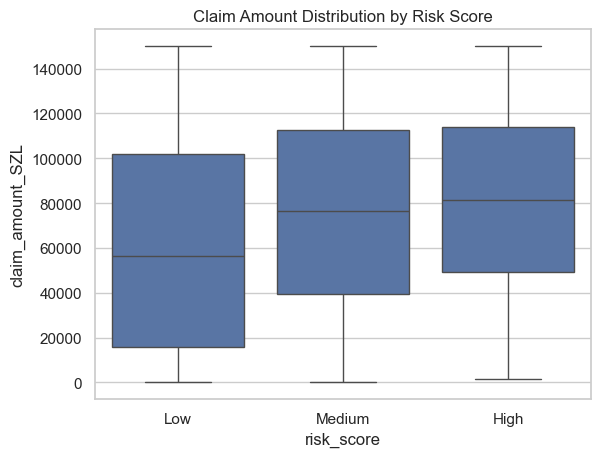

In [33]:
#bivariant analysis
#How does the claim amount vary across different risk levels?
sns.boxplot(data=insurance_df, x="risk_score", y="claim_amount_SZL")
plt.title("Claim Amount Distribution by Risk Score")
plt.show()
# high-risk individuals are more expensive in terms of claims.

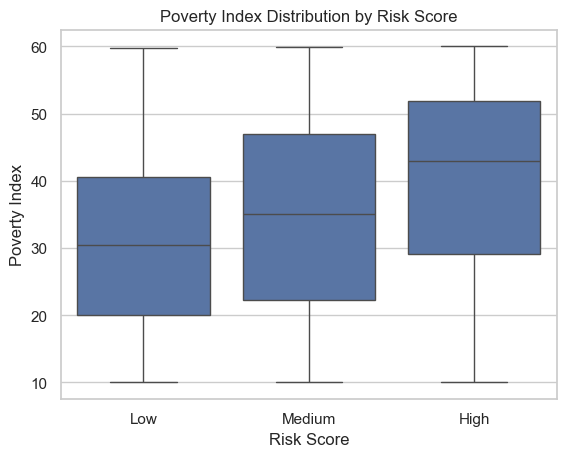

In [46]:
#Is there a trend between poverty index and risk category?
sns.boxplot(data=insurance_df, x="risk_score", y="poverty_index")
plt.title("Poverty Index Distribution by Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Poverty Index")
plt.show()

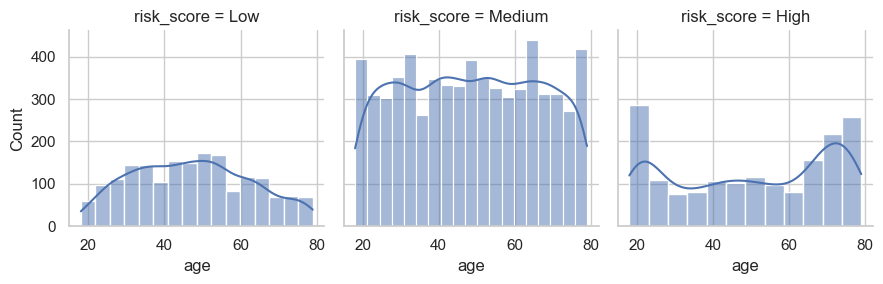

In [51]:
#Are younger or older people more likely to fall into higher risk groups?
g = sns.FacetGrid(insurance_df, col="risk_score")
g.map(sns.histplot, "age", kde=True)
plt.show()

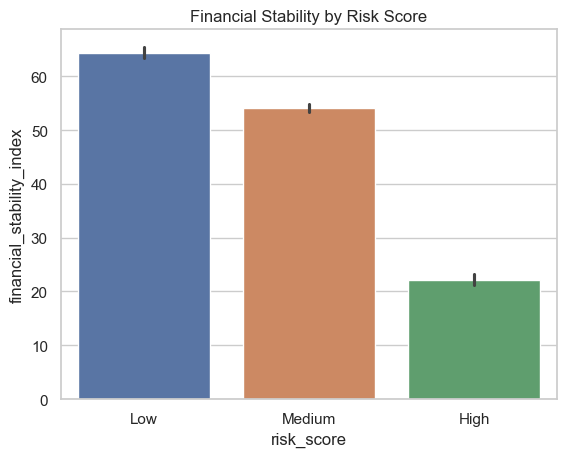

In [57]:
#Does lower financial stability associate with higher risk
sns.barplot(
    data=insurance_df,
    x="risk_score",  # Categories on x-axis
    y="financial_stability_index",  # Numeric values to aggregate
    hue="risk_score"
)
plt.title("Financial Stability by Risk Score")
plt.show()

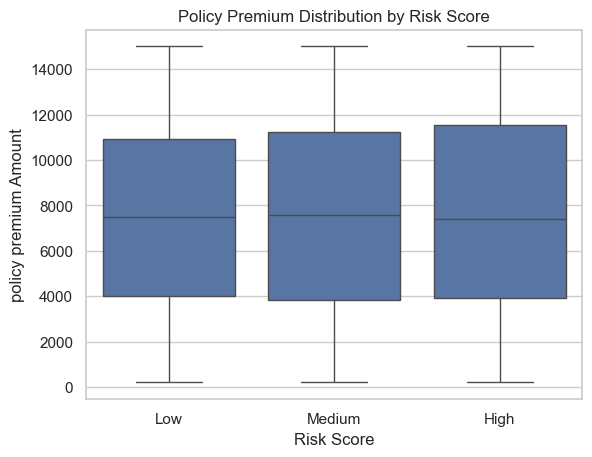

In [60]:
#Do policy premiums vary based on risk level?
sns.boxplot(data=insurance_df, x="risk_score", y="policy_premium_SZL")
plt.title("Policy Premium Distribution by Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("policy premium Amount")
plt.show()

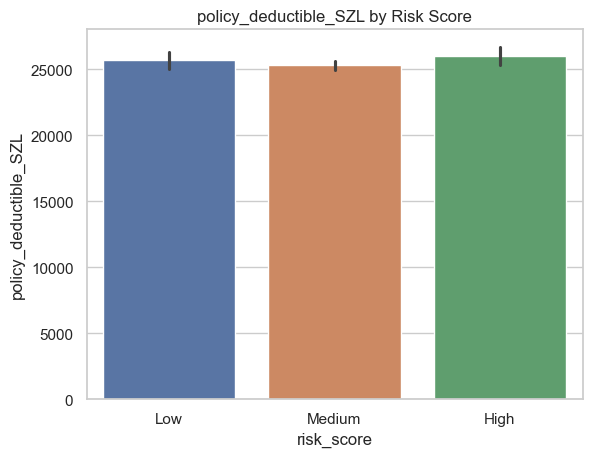

In [64]:
#Are higher deductibles associated with lower risk?
sns.barplot(data=insurance_df,x="risk_score", y="policy_deductible_SZL",hue="risk_score")
plt.title("policy_deductible_SZL by Risk Score")
plt.show()

<Axes: xlabel='risk_score', ylabel='household_size'>

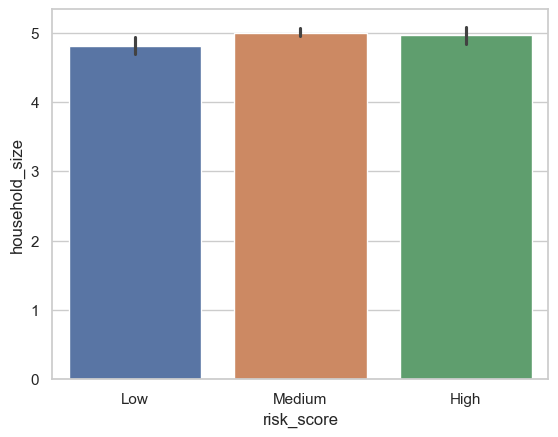

In [69]:
#Does household size correlate with risk category?
sns.barplot(data=insurance_df,y="household_size",x="risk_score", hue="risk_score")

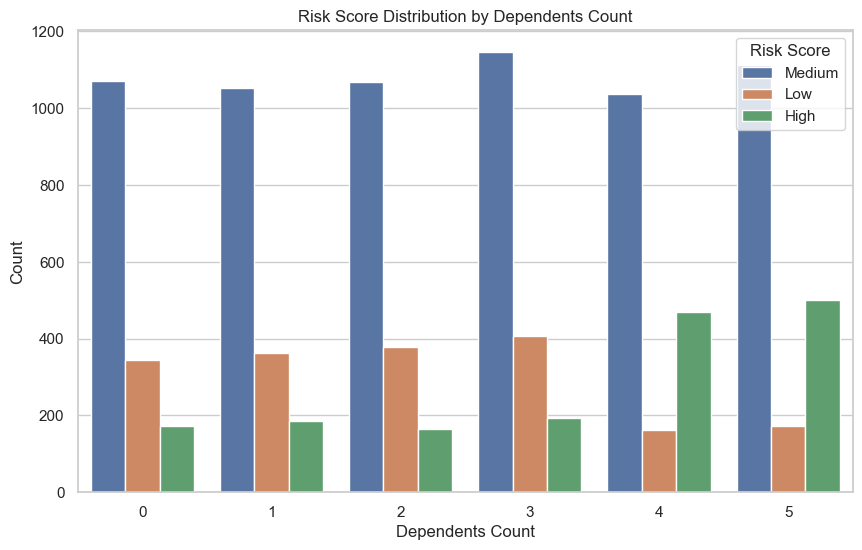

In [79]:
# #Does having more dependents mean a person is riskier?
plt.figure(figsize=(10,6))
sns.countplot(data=insurance_df, 
             x='dependents_count', 
             hue='risk_score')
plt.title("Risk Score Distribution by Dependents Count")
plt.xlabel("Dependents Count")
plt.ylabel("Count")
plt.legend(title='Risk Score')
plt.show()

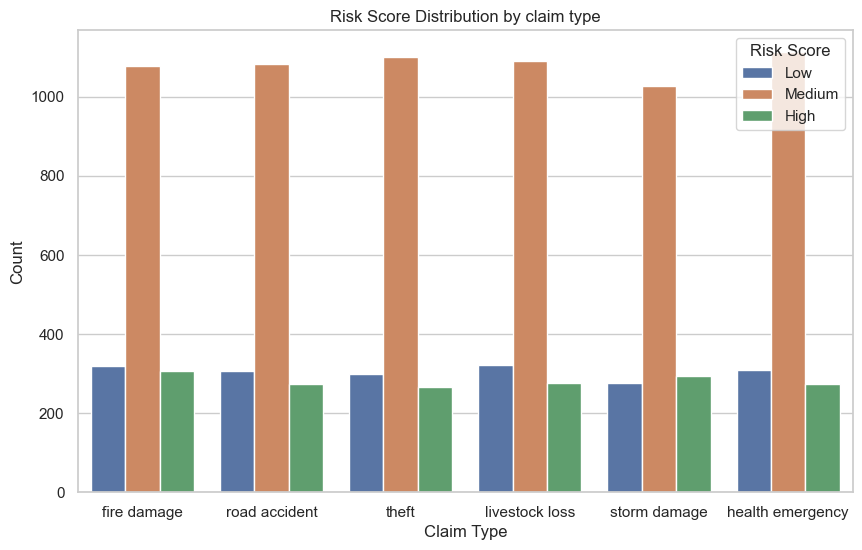

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=insurance_df, 
             x='claim_type', 
             hue='risk_score')
plt.title("Risk Score Distribution by claim type")
plt.xlabel("Claim Type")
plt.ylabel("Count")
plt.legend(title='Risk Score')
plt.show()

<Axes: xlabel='risk_score', ylabel='count'>

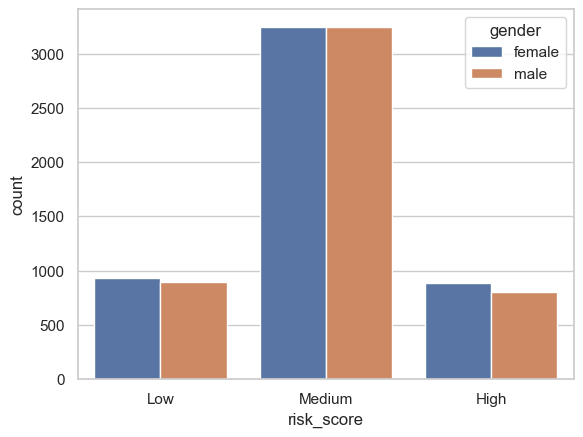

In [89]:
sns.countplot(data=insurance_df, x='risk_score', hue='gender')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'home insurance'),
  Text(1, 0, 'vehicle insurance'),
  Text(2, 0, 'funeral cover'),
  Text(3, 0, 'life insurance'),
  Text(4, 0, 'health insurance')])

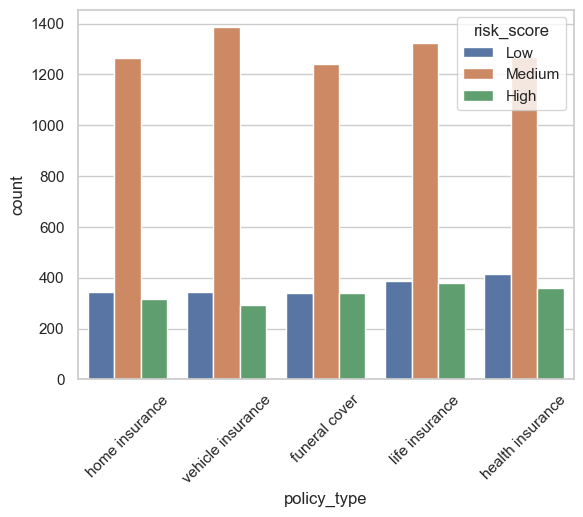

In [92]:
sns.countplot(data=insurance_df, hue='risk_score', x='policy_type')
plt.xticks(rotation=45)

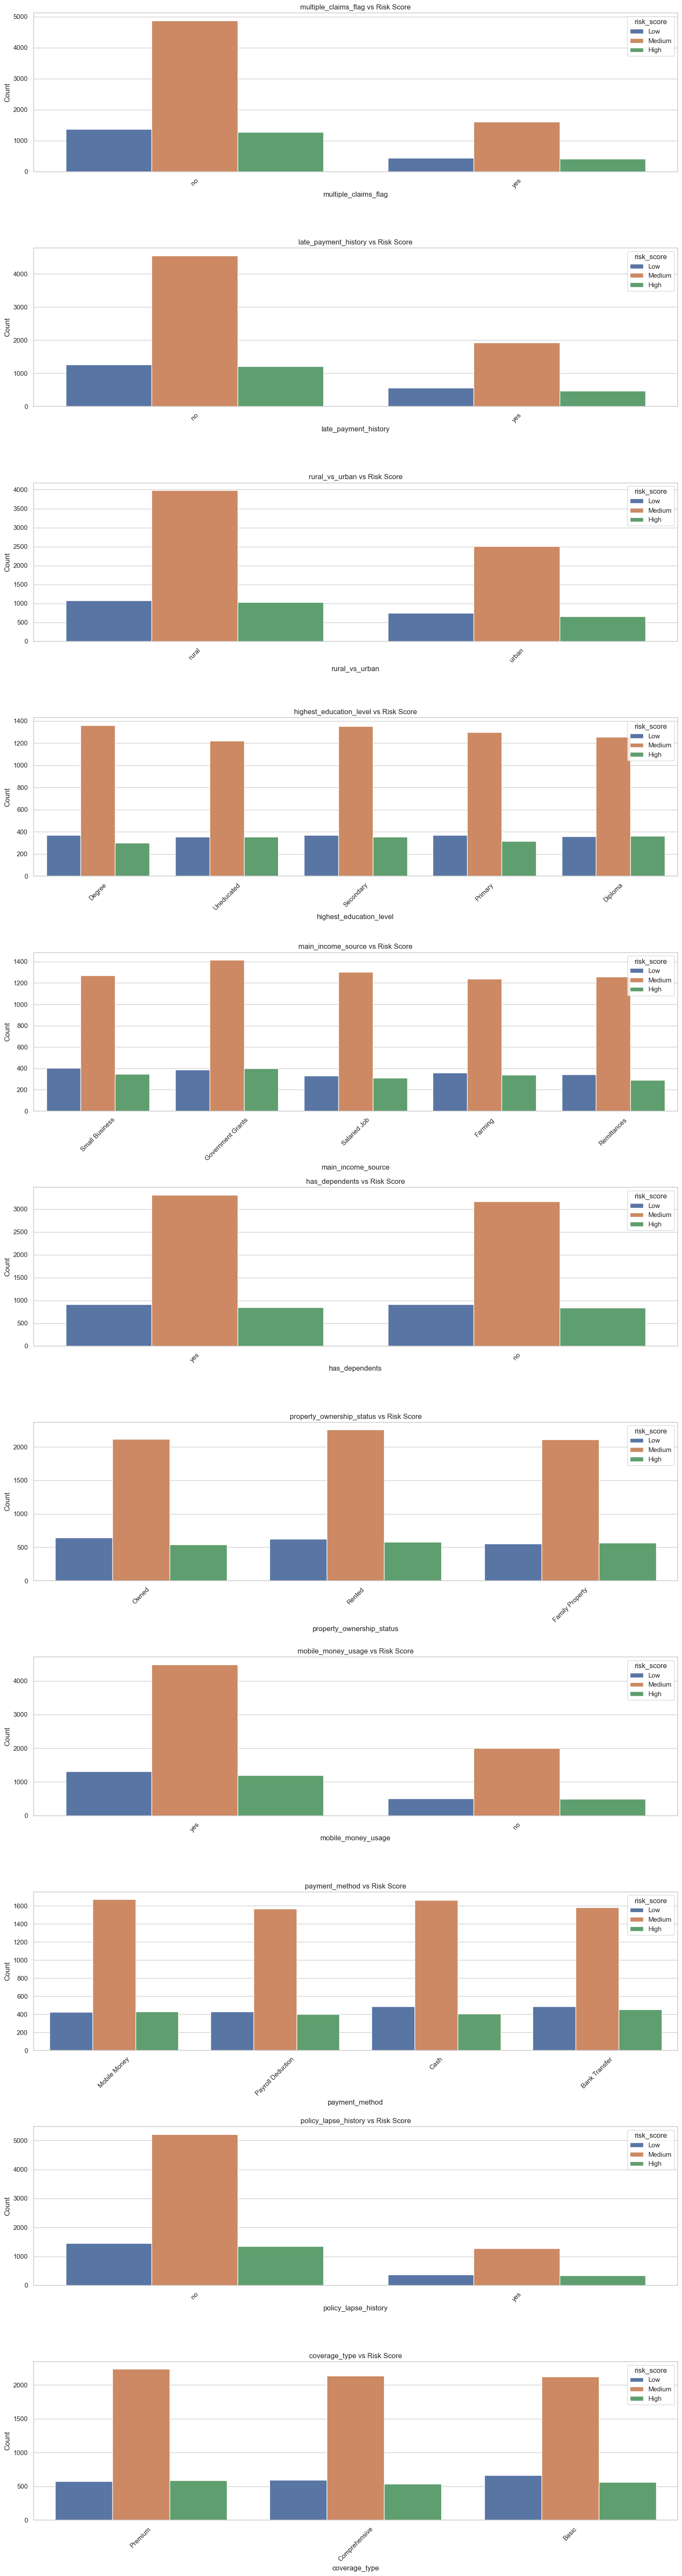

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to analyze
categorical_columns = [
    'multiple_claims_flag', 'late_payment_history',
    'rural_vs_urban', 'highest_education_level', 'main_income_source',
    'has_dependents', 'property_ownership_status', 'mobile_money_usage',
    'payment_method', 'policy_lapse_history', 'coverage_type'
]

# Set up plotting area
plt.figure(figsize=(16,60))

for idx, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, idx + 1)
    sns.countplot(data=insurance_df, x=col, hue='risk_score')
    plt.title(f'{col} vs Risk Score')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


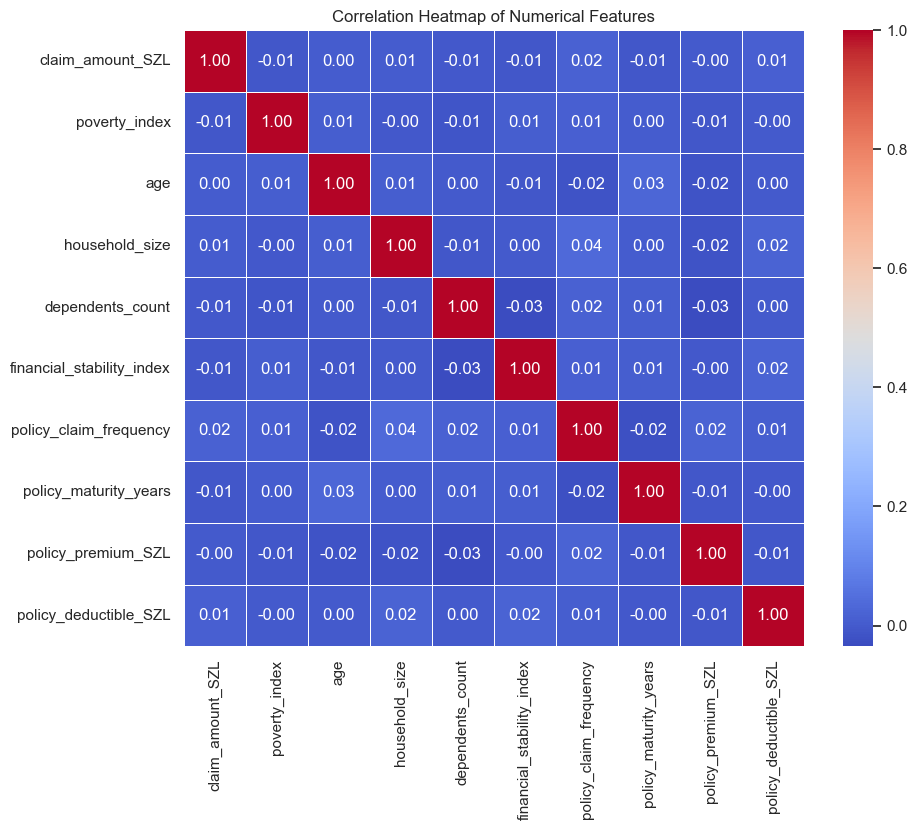

In [95]:
#multivariant analysis
corr = insurance_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 2: Split the data
X = insurance_df[['claim_amount_SZL', 'poverty_index', 'age','financial_stability_index', 'dependents_count','claim_type', 'gender', 
                  'policy_type', 'multiple_claims_flag','late_payment_history', 'rural_vs_urban', 'policy_lapse_history']]
y = insurance_df['risk_score']


In [55]:
X

,claim_amount_SZL,poverty_index,age,financial_stability_index,dependents_count,claim_type,gender,policy_type,multiple_claims_flag,late_payment_history,rural_vs_urban,policy_lapse_history
0,92345.33,13.45,45,54.95,3,fire damage,female,home insurance,no,no,rural,no
1,46029.42,10.05,29,16.24,5,road accident,male,vehicle insurance,no,no,rural,no
2,114275.22,12.35,54,65.39,0,theft,female,vehicle insurance,yes,no,rural,no
3,68858.64,48.20,57,43.14,2,fire damage,female,home insurance,yes,yes,rural,no
4,48337.09,18.08,77,60.92,4,livestock loss,female,funeral cover,no,yes,urban,no
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,129613.61,17.24,77,32.27,0,storm damage,female,home insurance,no,no,rural,no
9996,74096.47,26.32,54,20.57,4,road accident,male,vehicle insurance,no,no,rural,yes
9997,65131.45,18.90,55,56.21,0,fire damage,female,vehicle insurance,no,no,urban,no
9998,35313.83,17.21,21,18.00,3,theft,female,health insurance,no,no,rural,yes


In [56]:
X['gender'] = X['gender'].map({'male': 0, 'female': 1})

X['multiple_claims_flag'] = X['multiple_claims_flag'].map({'yes': 1, 'no': 0})

X['late_payment_history'] = X['late_payment_history'].map({'yes': 1, 'no': 0})

X['rural_vs_urban'] = X['rural_vs_urban'].map({'urban': 1, 'rural': 0})

X['policy_lapse_history'] = X['policy_lapse_history'].map({'yes': 1, 'no': 0})


C:\Users\DELL\AppData\Local\Temp\ipykernel_20224\1051443017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'male': 0, 'female': 1})
C:\Users\DELL\AppData\Local\Temp\ipykernel_20224\1051443017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['multiple_claims_flag'] = X['multiple_claims_flag'].map({'yes': 1, 'no': 0})
C:\Users\DELL\AppData\Local\Temp\ipykernel_20224\1051443017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [59]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(X[['claim_type', 'policy_type']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['claim_type', 'policy_type']))

# Concatenate with original or drop original
X = pd.concat([X, encoded_df], axis=1).drop(columns=['claim_type', 'policy_type'])


In [60]:
X.head(50)

,claim_amount_SZL,poverty_index,age,financial_stability_index,dependents_count,gender,multiple_claims_flag,late_payment_history,rural_vs_urban,policy_lapse_history,...,claim_type_health emergency,claim_type_livestock loss,claim_type_road accident,claim_type_storm damage,claim_type_theft,policy_type_funeral cover,policy_type_health insurance,policy_type_home insurance,policy_type_life insurance,policy_type_vehicle insurance
0,92345.33,13.45,45,54.95,3,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46029.42,10.05,29,16.24,5,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,114275.22,12.35,54,65.39,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,68858.64,48.20,57,43.14,2,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,48337.09,18.08,77,60.92,4,1,0,1,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,144574.83,46.36,18,42.40,5,1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,129794.52,13.74,44,28.15,3,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,27131.27,42.01,36,2.81,5,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,105125.95,37.98,49,1.13,4,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,113172.42,59.33,47,53.10,4,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#Scaling
scaler = StandardScaler()

# Reshape to 2D for scaler
X['claim_amount_SZL'] = scaler.fit_transform(X[['claim_amount_SZL']])
X['poverty_index'] = scaler.fit_transform(X[['poverty_index']])
X['financial_stability_index'] = scaler.fit_transform(X[['financial_stability_index']])

In [64]:
#  Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [67]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 21), (2000, 21), (8000,), (2000,))

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:15:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Performance of Logistic Regression:
Accuracy : 0.69
Precision: 0.66
Recall   : 0.69
F1-score : 0.63

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.49      0.57       338
           1       0.54      0.07      0.13       365
           2       0.70      0.92      0.79      1297

    accuracy                           0.69      2000
   macro avg       0.63      0.49      0.50      2000
weighted avg       0.66      0.69      0.63      2000

----------------------------------------


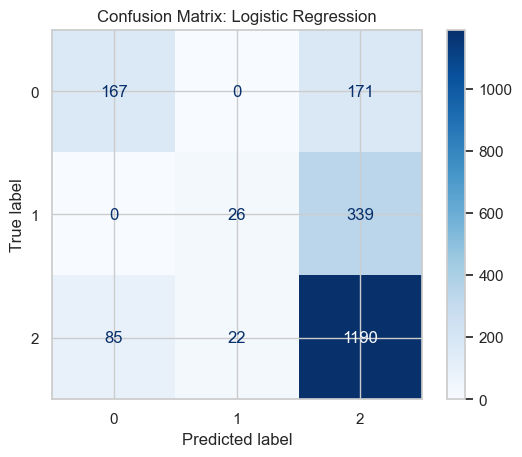

Performance of Support Vector Classification:
Accuracy : 0.65
Precision: 0.42
Recall   : 0.65
F1-score : 0.51

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.00      0.00      0.00       365
           2       0.65      1.00      0.79      1297

    accuracy                           0.65      2000
   macro avg       0.22      0.33      0.26      2000
weighted avg       0.42      0.65      0.51      2000

----------------------------------------


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

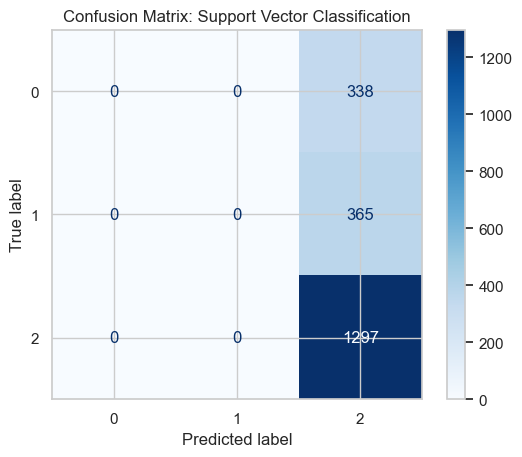

Performance of Decision Tree:
Accuracy : 0.69
Precision: 0.67
Recall   : 0.69
F1-score : 0.66

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       338
           1       0.52      0.25      0.34       365
           2       0.71      0.88      0.79      1297

    accuracy                           0.69      2000
   macro avg       0.64      0.53      0.56      2000
weighted avg       0.67      0.69      0.66      2000

----------------------------------------


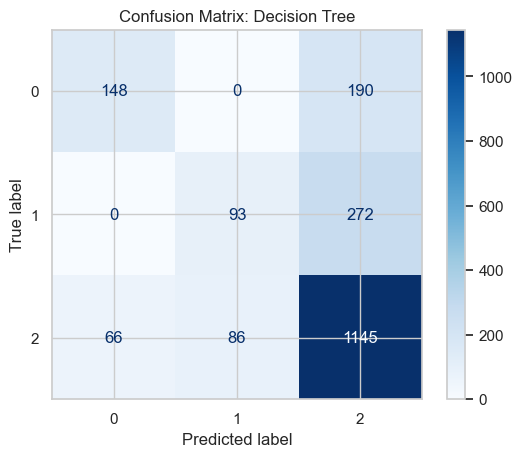

Performance of Random Forest:
Accuracy : 0.65
Precision: 0.42
Recall   : 0.65
F1-score : 0.51

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.00      0.00      0.00       365
           2       0.65      1.00      0.79      1297

    accuracy                           0.65      2000
   macro avg       0.22      0.33      0.26      2000
weighted avg       0.42      0.65      0.51      2000

----------------------------------------


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

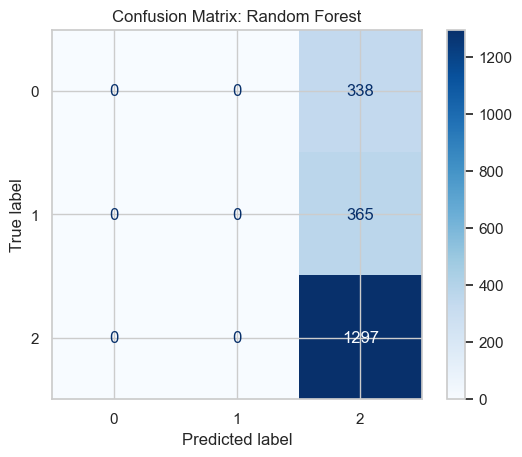

Performance of XGBoost:
Accuracy : 0.80
Precision: 0.80
Recall   : 0.80
F1-score : 0.78

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       338
           1       0.75      0.37      0.50       365
           2       0.81      0.90      0.85      1297

    accuracy                           0.80      2000
   macro avg       0.78      0.72      0.73      2000
weighted avg       0.80      0.80      0.78      2000

----------------------------------------


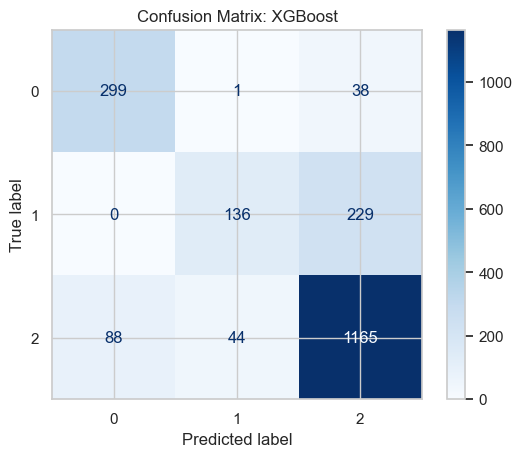

Performance of Naive Bayes:
Accuracy : 0.70
Precision: 0.69
Recall   : 0.70
F1-score : 0.63

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       338
           1       0.68      0.06      0.12       365
           2       0.70      0.94      0.80      1297

    accuracy                           0.70      2000
   macro avg       0.69      0.49      0.49      2000
weighted avg       0.69      0.70      0.63      2000

----------------------------------------


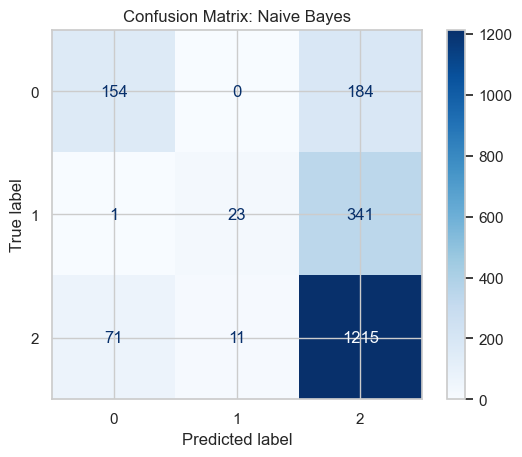

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report


# --- Train Models ---

# Logistic Regression
lr_model = LogisticRegression(max_iter=10000, random_state=0, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Support Vector Classification
svc_model = SVC(kernel='rbf', decision_function_shape='ovr', random_state=0)
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=0, max_depth=2)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    print(f"Performance of {name}:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall   : {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F1-score : {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

    # Optional: Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# --- Evaluate All Models ---
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Support Vector Classification", y_test, svc_preds)
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Naive Bayes", y_test, nb_preds)


In [71]:
from sklearn.metrics import roc_auc_score

y_probs = xgb_model.predict_proba(X_test) 
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.89


In [72]:
import pickle

with open("insurance_risk_classification_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)